In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from scipy.stats import mode
import csv
import matplotlib.dates
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from datetime import *
import matplotlib.pylab as pylab
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']


In [25]:
#导入测试集进行数据处理
test_df = pd.read_csv('../../data/round2_ijcai_18_test_a_20180425.txt', sep=' ')

test_df['date'] = test_df.context_timestamp.map(lambda x: datetime.datetime.fromtimestamp(x))
test_df['weekday'] = test_df['date'].map(lambda x: x.weekday())
test_df['day'] = test_df['date'].map(lambda x: x.day)
test_df['hour'] = test_df['date'].map(lambda x: x.hour)

print(test_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519888 entries, 0 to 519887
Data columns (total 30 columns):
instance_id                  519888 non-null int64
item_id                      519888 non-null int64
item_category_list           519888 non-null object
item_property_list           519888 non-null object
item_brand_id                519888 non-null int64
item_city_id                 519888 non-null int64
item_price_level             519888 non-null int64
item_sales_level             519888 non-null int64
item_collected_level         519888 non-null int64
item_pv_level                519888 non-null int64
user_id                      519888 non-null int64
user_gender_id               519888 non-null int64
user_age_level               519888 non-null int64
user_occupation_id           519888 non-null int64
user_star_level              519888 non-null int64
context_id                   519888 non-null int64
context_timestamp            519888 non-null int64
context_page_id     

In [2]:
#导入结果数据
result_df = pd.read_csv('../../data/fusai/submit/fusai_b_xgb_5_14_normal.txt', sep=' ')
print(result_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209768 entries, 0 to 1209767
Data columns (total 3 columns):
instance_id        1209768 non-null int64
predicted_score    1209768 non-null float64
hour               1209768 non-null int64
dtypes: float64(1), int64(2)
memory usage: 27.7 MB
None


In [27]:
test_df = pd.merge(test_df, result_df, on=['instance_id'], how='left')
print(test_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 519888 entries, 0 to 519887
Data columns (total 31 columns):
instance_id                  519888 non-null int64
item_id                      519888 non-null int64
item_category_list           519888 non-null object
item_property_list           519888 non-null object
item_brand_id                519888 non-null int64
item_city_id                 519888 non-null int64
item_price_level             519888 non-null int64
item_sales_level             519888 non-null int64
item_collected_level         519888 non-null int64
item_pv_level                519888 non-null int64
user_id                      519888 non-null int64
user_gender_id               519888 non-null int64
user_age_level               519888 non-null int64
user_occupation_id           519888 non-null int64
user_star_level              519888 non-null int64
context_id                   519888 non-null int64
context_timestamp            519888 non-null int64
context_page_id     

In [3]:
test_df_pivot_table = pd.pivot_table(result_df[['hour', 'predicted_score']], index=['hour'], aggfunc=mean)
test_df_pivot_table.reset_index(inplace=True)
test_df_pivot_table.rename(columns={'predicted_score':'predicted_score_hour_mean'}, inplace=True)
print(test_df_pivot_table.head(20))


    hour  predicted_score_hour_mean
0     12                   0.043358
1     13                   0.043546
2     14                   0.042618
3     15                   0.042743
4     16                   0.043237
5     17                   0.043926
6     18                   0.043956
7     19                   0.044257
8     20                   0.044773
9     21                   0.044650
10    22                   0.045242
11    23                   0.045335


/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


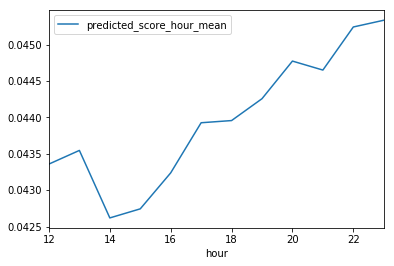

In [4]:
test_df_pivot_table.plot(x='hour', y='predicted_score_hour_mean')
plt.show()
